In [6]:
import yfinance as yf
import time
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from prophet import Prophet

In [2]:
tick = ['ZEC-USD']
start_date = datetime(2023, 10, 1).strftime('%Y-%m-%d')
end_date = datetime(2024, 10, 1).strftime('%Y-%m-%d')

In [3]:
df = yf.download(tick, start= start_date , end = end_date )[['Close']]

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
df.isnull().sum()

Price  Ticker 
Close  ZEC-USD    0
dtype: int64

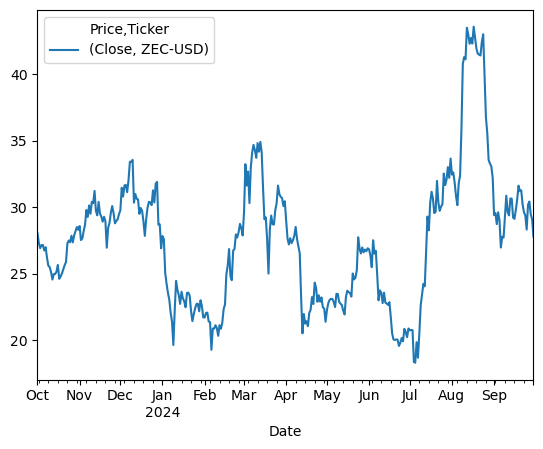

In [5]:
#first visualise data 
df.plot()
plt.show()

In [8]:
df

Price,Close
Ticker,ZEC-USD
Date,
2023-10-01,28.063318
2023-10-02,27.304394
2023-10-03,26.915659
2023-10-04,27.146259
2023-10-05,27.155380
...,...
2024-09-26,30.190125
2024-09-27,30.426661


11:51:41 - cmdstanpy - INFO - Chain [1] start processing
11:51:41 - cmdstanpy - INFO - Chain [1] done processing


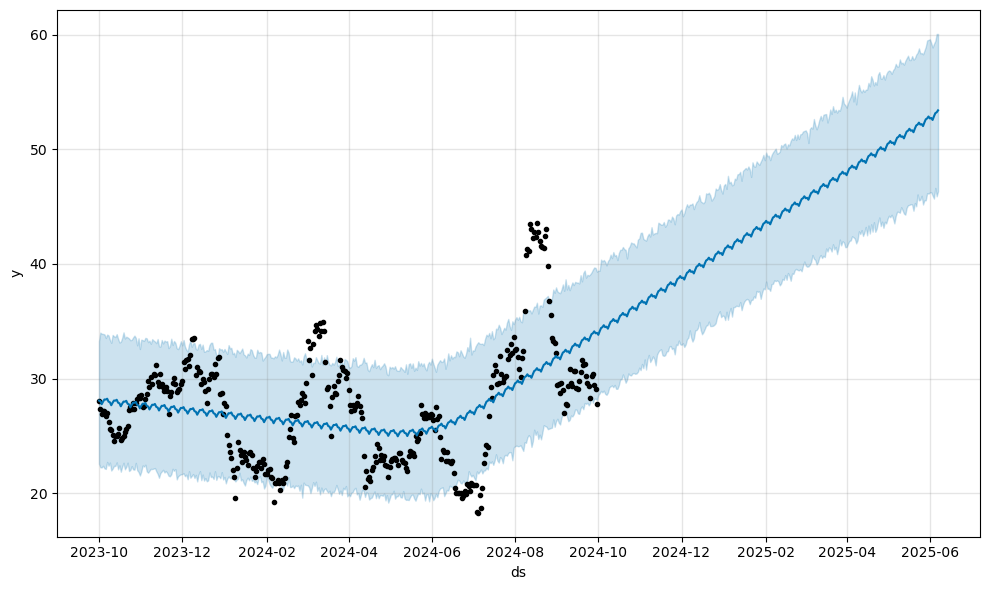

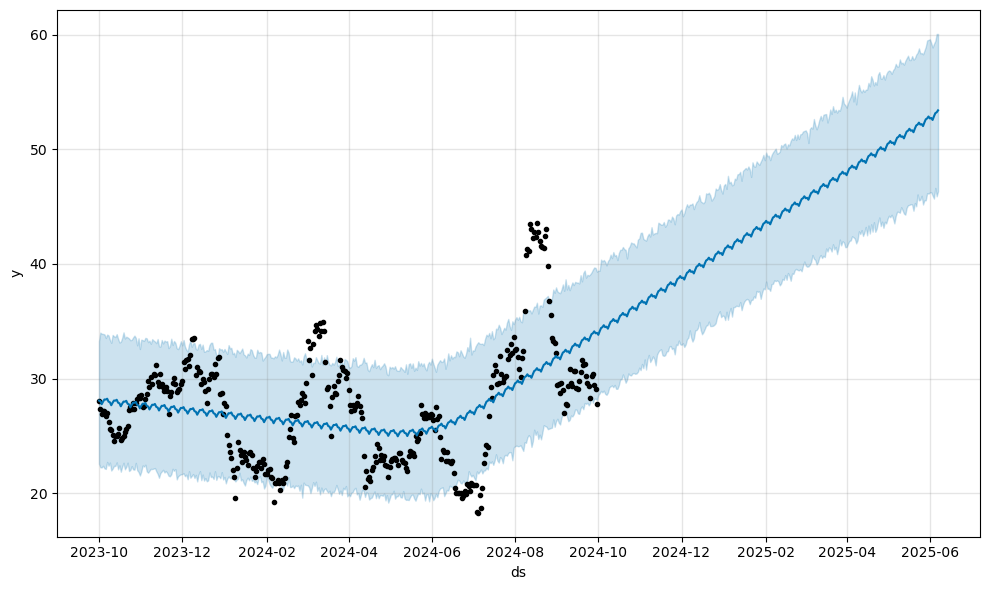

In [11]:
df_prophet = df.reset_index()[['Date', 'Close']]
df_prophet.columns = ['ds', 'y']

model = Prophet()
model.fit(df_prophet)

future = model.make_future_dataframe(periods=30)  # adjust 30 to however many days you want

forecast = model.predict(future)

model.plot(forecast)


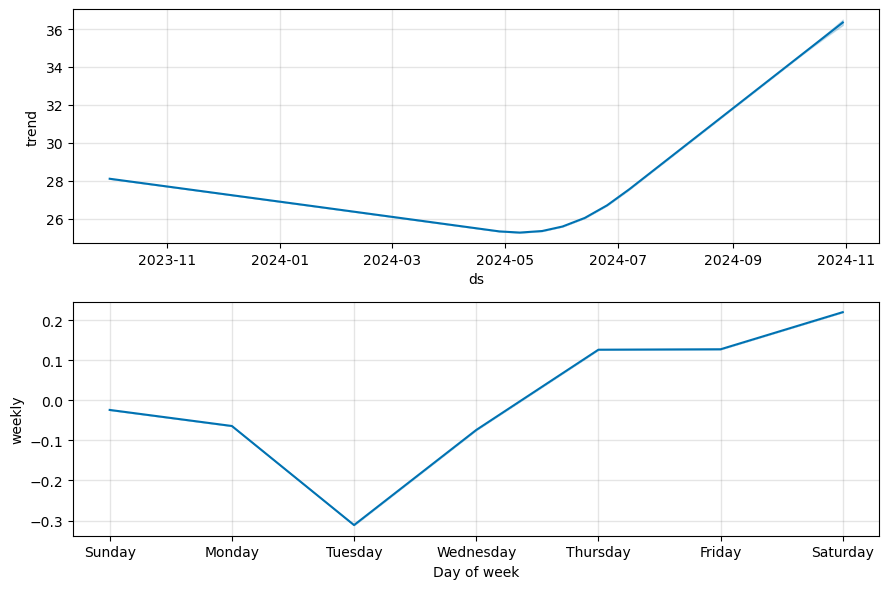

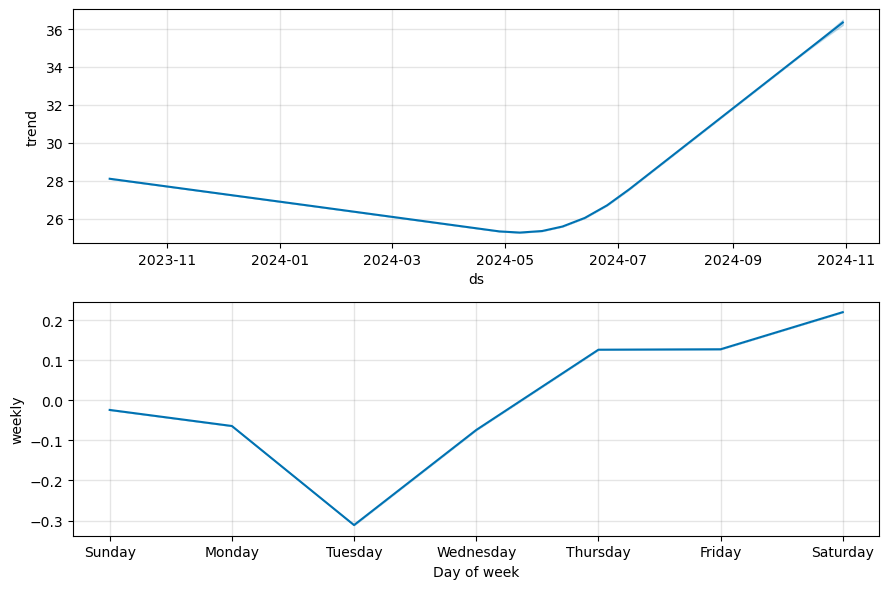

In [9]:
model.plot_components(forecast)

In [12]:
pip install neuralprophet

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 24.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/829.5 kB ? eta -:--:--
   --------------------------------------- 829.5/829.5 kB 18.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/961.5 kB ? eta -:--:--
   --------------------------------------- 961.5/961.5 kB 46.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install plotly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install ipywidgets


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [20]:
from neuralprophet import NeuralProphet

# You can adjust n_lags (past days to use) and n_forecasts (future steps)
model = NeuralProphet(
    n_lags=30,           # use past 30 days as input
    n_forecasts=7,       # predict next 7 days
    yearly_seasonality=False,
    weekly_seasonality=True,
    daily_seasonality=False,
    learning_rate=1.0
)

metrics = model.fit(df_prophet, freq='D')


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - C:\Users\asus\AppData\Roaming\Python\Python312\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.727% of the data.
WARNING - (py.warnings._showwarnmsg) - C:\Users\asus\AppData\Roaming\Python\Python312\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - C:\Users\asus\AppData\Roaming\Python\Python312\site-packages\neur

Training: 0it [00:00, ?it/s]

In [21]:
future = model.make_future_dataframe(df_prophet, periods=7)  # forecast next 7 days
forecast = model.predict(future)


WARNING - (py.warnings._showwarnmsg) - C:\Users\asus\AppData\Roaming\Python\Python312\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.727% of the data.
WARNING - (py.warnings._showwarnmsg) - C:\Users\asus\AppData\Roaming\Python\Python312\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - C:\Users\asus\AppData\Roaming\Python\Python312\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype

Predicting: 21it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
